# How this notebook is laid out

1) First load required packages
2) Run 10 instances of hill-climbing, simulated annealing, and genetic algorithm by invoking later cells.
3) Compare and print statistics

Individual cells for the local search algorithms need not be run manually. The analytics cell (cell 3) invokes the respective cells with the search algorithms


In [1]:
# Verify required packages are available
import sys
print(f"Python version: {sys.version}")

try:
    import numpy as np
    print(f"✓ numpy {np.__version__} is available")
except ImportError as e:
    print(f"✗ numpy not available: {e}")

try:
    import matplotlib.pyplot as plt
    print("✓ matplotlib is available")
except ImportError as e:
    print(f"✗ matplotlib not available: {e}")

print("All required packages are ready!")

Python version: 3.12.12 (main, Oct  9 2025, 11:07:00) [Clang 17.0.0 (clang-1700.6.3.2)]
✓ numpy 2.4.1 is available
✓ matplotlib is available
All required packages are ready!


COMPREHENSIVE ALGORITHM COMPARISON
Running 20 trials for each algorithm...

--- Run 1/20 ---
Initial objective: 8.844
Running Hill Climbing... Done
Running Simulated Annealing... Done
Running Genetic Algorithm... Done
HC: 5.195, SA: 6.855, GA: 6.219

--- Run 2/20 ---
Initial objective: 13.956
Running Hill Climbing... Done
Running Simulated Annealing... Done
Running Genetic Algorithm... Done
HC: 6.932, SA: 7.892, GA: 5.708

--- Run 3/20 ---
Initial objective: 12.179
Running Hill Climbing... Done
Running Simulated Annealing... Done
Running Genetic Algorithm... Done
HC: 6.915, SA: 6.143, GA: 5.815

--- Run 4/20 ---
Initial objective: 12.412
Running Hill Climbing... Done
Running Simulated Annealing... Done
Running Genetic Algorithm... Done
HC: 5.092, SA: 7.956, GA: 5.752

--- Run 5/20 ---
Initial objective: 12.319
Running Hill Climbing... Done
Running Simulated Annealing... Done
Running Genetic Algorithm... Done
HC: 6.863, SA: 10.305, GA: 5.886

--- Run 6/20 ---
Initial objective: 13.975
R

/var/folders/lc/tld6z0vj04v1wpxcbffz_wk40000gn/T/ipykernel_55691/855339764.py:147: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=labels, patch_artist=True)
/var/folders/lc/tld6z0vj04v1wpxcbffz_wk40000gn/T/ipykernel_55691/855339764.py:162: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(time_data, labels=labels, patch_artist=True)


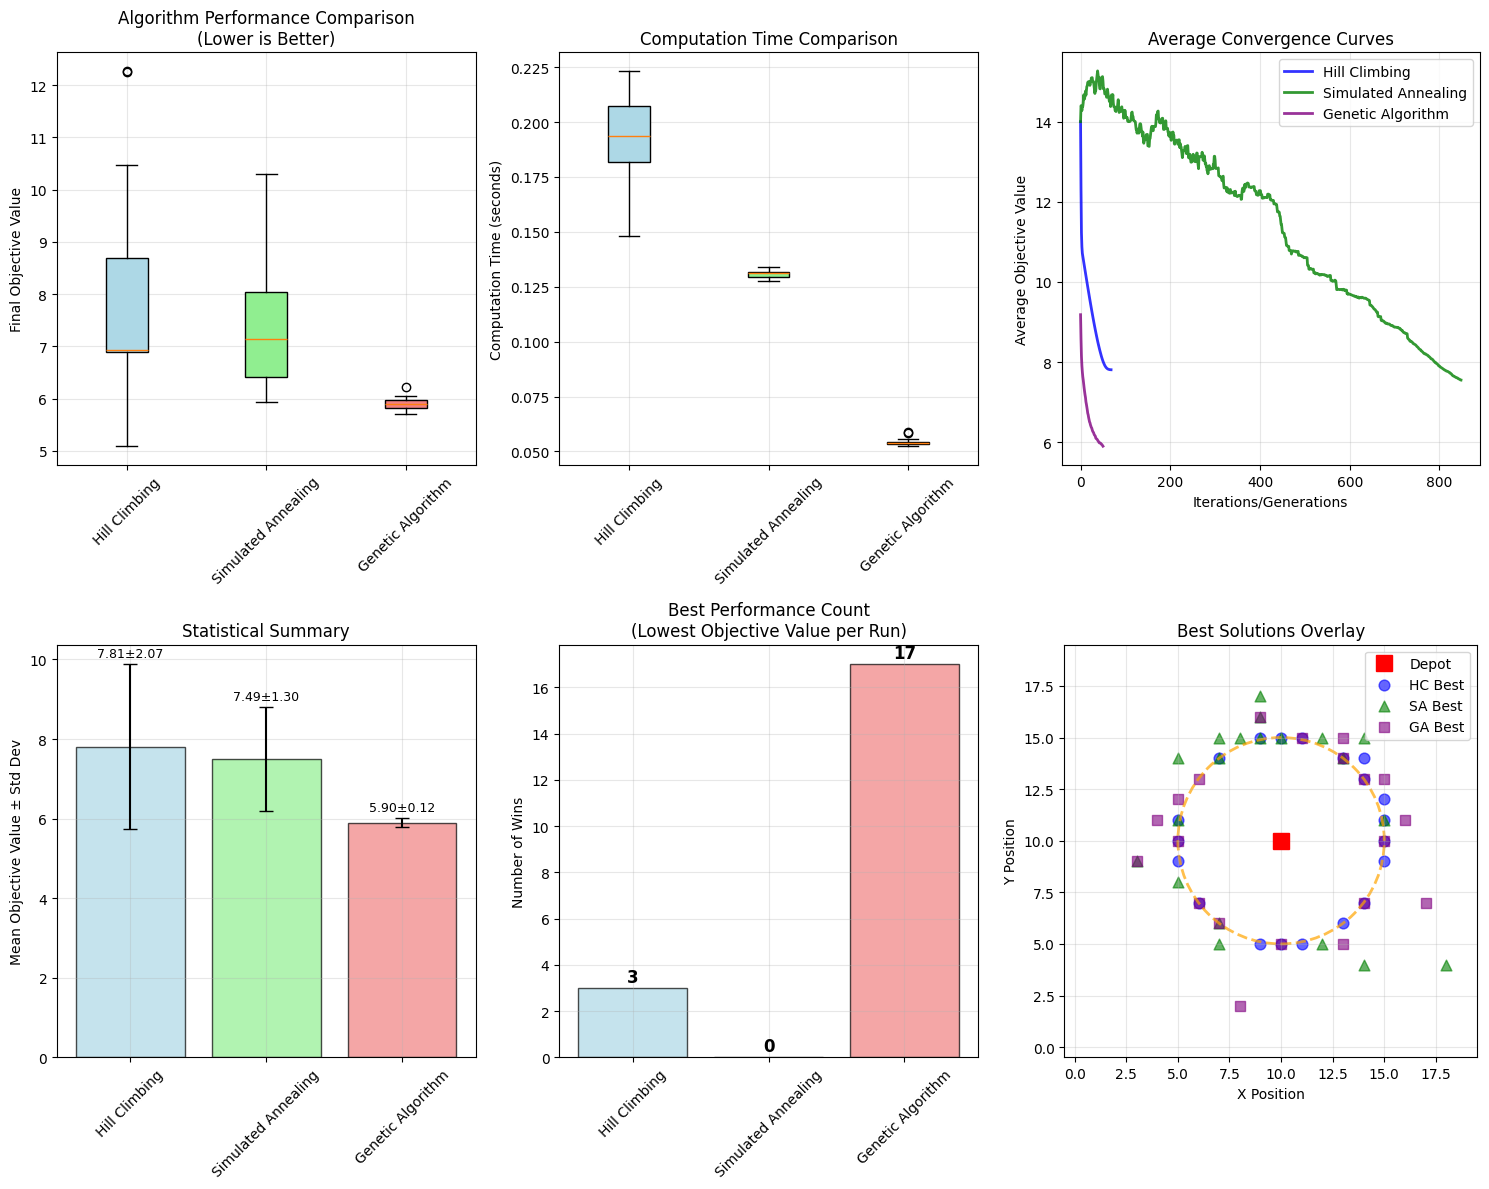


DETAILED STATISTICAL ANALYSIS

1. OBJECTIVE FUNCTION RESULTS:
--------------------------------------------------
Hill Climbing:
  Mean: 7.810
  Std:  2.067
  Min:  5.092
  Max:  12.272
  Median: 6.939
Simulated Annealing:
  Mean: 7.489
  Std:  1.304
  Min:  5.937
  Max:  10.305
  Median: 7.150
Genetic Algorithm:
  Mean: 5.902
  Std:  0.123
  Min:  5.708
  Max:  6.219
  Median: 5.901

2. COMPUTATION TIME ANALYSIS:
--------------------------------------------------
Hill Climbing:
  Mean time: 0.193 seconds
  Std time:  0.020 seconds
Simulated Annealing:
  Mean time: 0.131 seconds
  Std time:  0.002 seconds
Genetic Algorithm:
  Mean time: 0.054 seconds
  Std time:  0.002 seconds

3. CONVERGENCE ANALYSIS:
--------------------------------------------------
Hill Climbing:
  Mean iterations: 56.8
Simulated Annealing:
  Mean iterations: 848.0
Genetic Algorithm:
  Mean generations: 50.0

4. PAIRWISE STATISTICAL TESTS:
--------------------------------------------------
Statistical tests skipped

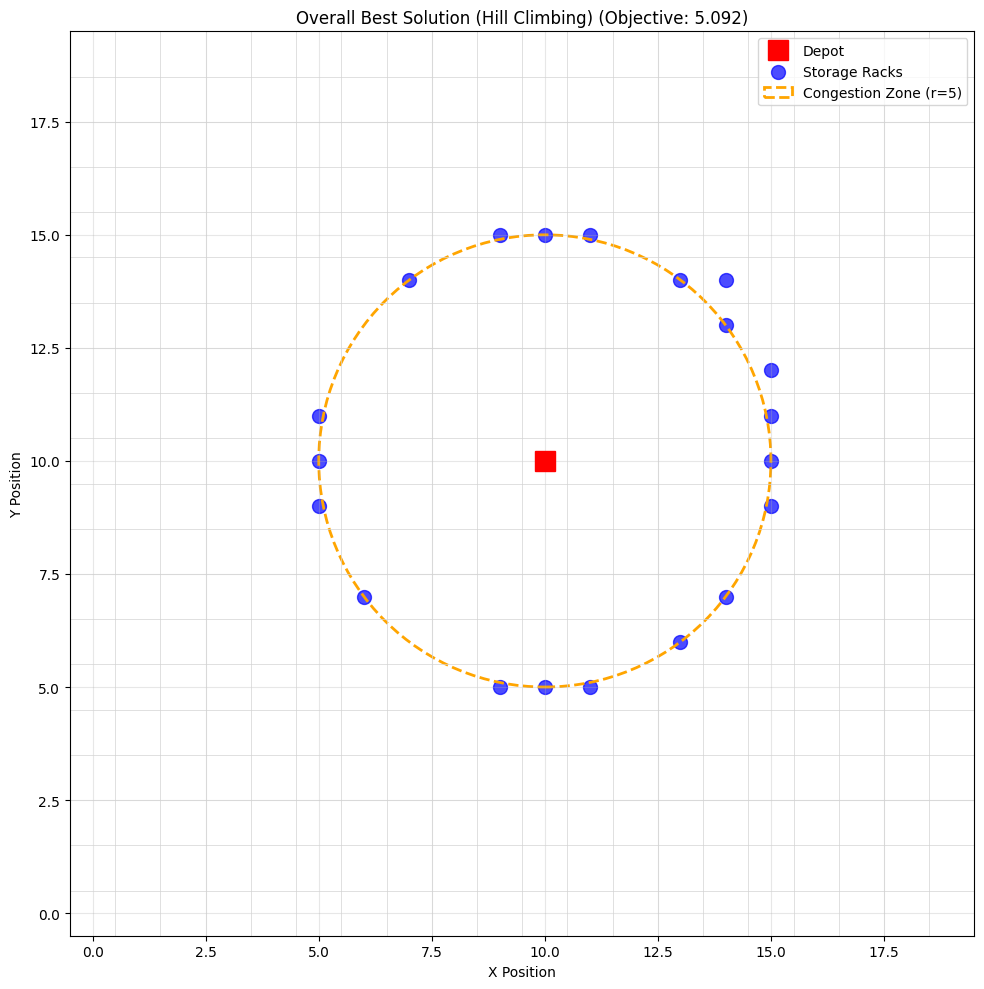

In [6]:
# Comprehensive Comparison of All Three Local Search Algorithms

import numpy as np
import matplotlib.pyplot as plt
import time
import random
import math

# Try to import scipy, provide fallback if not available
try:
    from scipy import stats
    SCIPY_AVAILABLE = True
except ImportError:
    print("Warning: scipy not available, statistical tests will be skipped")
    SCIPY_AVAILABLE = False

def run_algorithm_comparison(num_runs=20):
    """
    Run all three algorithms on multiple random initial states and compare results
    
    Args:
        num_runs: Number of different random initial states to test
        
    Returns:
        Dictionary containing all results for comparison
    """
    print("="*80)
    print("COMPREHENSIVE ALGORITHM COMPARISON")
    print("="*80)
    print(f"Running {num_runs} trials for each algorithm...")
    
    # Storage for results
    results = {
        'hill_climbing': {
            'best_values': [],
            'computation_times': [],
            'iterations': [],
            'convergence_histories': [],
            'final_solutions': []
        },
        'simulated_annealing': {
            'best_values': [],
            'computation_times': [],
            'iterations': [],
            'convergence_histories': [],
            'final_solutions': []
        },
        'genetic_algorithm': {
            'best_values': [],
            'computation_times': [],
            'generations': [],
            'convergence_histories': [],
            'final_solutions': []
        }
    }
    
    # Set random seed for reproducibility
    np.random.seed(123)
    random.seed(123)
    
    for run in range(num_runs):
        print(f"\n--- Run {run + 1}/{num_runs} ---")
        
        # Generate random initial state for this run
        initial_state = generate_random_layout()
        initial_obj = objective_function(initial_state)
        print(f"Initial objective: {initial_obj:.3f}")
        
        # Run Hill Climbing (suppress output)
        print("Running Hill Climbing...", end="")
        import sys
        import io
        old_stdout = sys.stdout
        sys.stdout = io.StringIO()  # Redirect stdout to suppress prints
        try:
            hc_result = hill_climbing(initial_state.copy(), max_iterations=500)
        finally:
            sys.stdout = old_stdout  # Restore stdout
        print(" Done")
        
        results['hill_climbing']['best_values'].append(hc_result['best_value'])
        results['hill_climbing']['computation_times'].append(hc_result['computation_time'])
        results['hill_climbing']['iterations'].append(hc_result['total_iterations'])
        results['hill_climbing']['convergence_histories'].append(hc_result['iteration_history'])
        results['hill_climbing']['final_solutions'].append(hc_result['best_solution'])
        
        # Run Simulated Annealing (suppress output)
        print("Running Simulated Annealing...", end="")
        sys.stdout = io.StringIO()  # Redirect stdout
        try:
            sa_result = simulated_annealing(
                initial_state.copy(),
                max_iterations=1000,
                initial_temp=50.0,
                cooling_rate=0.99,
                min_temp=0.01
            )
        finally:
            sys.stdout = old_stdout  # Restore stdout
        print(" Done")
        
        results['simulated_annealing']['best_values'].append(sa_result['best_value'])
        results['simulated_annealing']['computation_times'].append(sa_result['computation_time'])
        results['simulated_annealing']['iterations'].append(sa_result['total_iterations'])
        results['simulated_annealing']['convergence_histories'].append(sa_result['iteration_history'])
        results['simulated_annealing']['final_solutions'].append(sa_result['best_solution'])
        
        # Run Genetic Algorithm (suppress output)
        print("Running Genetic Algorithm...", end="")
        sys.stdout = io.StringIO()  # Redirect stdout
        try:
            ga_result = genetic_algorithm(
                population_size=30,
                num_generations=50,
                crossover_rate=0.8,
                mutation_rate=0.15,
                elite_size=2
            )
        finally:
            sys.stdout = old_stdout  # Restore stdout
        print(" Done")
        results['genetic_algorithm']['best_values'].append(ga_result['best_value'])
        results['genetic_algorithm']['computation_times'].append(ga_result['computation_time'])
        results['genetic_algorithm']['generations'].append(ga_result['total_generations'])
        results['genetic_algorithm']['convergence_histories'].append(ga_result['generation_history'])
        results['genetic_algorithm']['final_solutions'].append(ga_result['best_solution'])
        
        print(f"HC: {hc_result['best_value']:.3f}, SA: {sa_result['best_value']:.3f}, GA: {ga_result['best_value']:.3f}")
    
    return results

def plot_comparison_results(results):
    """Plot comprehensive comparison of all three algorithms"""
    
    try:
        # Create figure with proper error handling
        fig = plt.figure(figsize=(15, 12))
        
        # 1. Box plot comparison of final objective values
        plt.subplot(2, 3, 1)
        data = [results['hill_climbing']['best_values'],
                results['simulated_annealing']['best_values'],
                results['genetic_algorithm']['best_values']]
        labels = ['Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm']
        colors = ['lightblue', 'lightgreen', 'lightcoral']
        
        bp = plt.boxplot(data, labels=labels, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        plt.ylabel('Final Objective Value')
        plt.title('Algorithm Performance Comparison\n(Lower is Better)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        
        # 2. Computation time comparison
        plt.subplot(2, 3, 2)
        time_data = [results['hill_climbing']['computation_times'],
                     results['simulated_annealing']['computation_times'],
                     results['genetic_algorithm']['computation_times']]
        
        bp = plt.boxplot(time_data, labels=labels, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        plt.ylabel('Computation Time (seconds)')
        plt.title('Computation Time Comparison')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        
        # 3. Average convergence curves
        plt.subplot(2, 3, 3)
        
        # Hill Climbing average convergence
        hc_histories = results['hill_climbing']['convergence_histories']
        if hc_histories:
            max_len_hc = max(len(h) for h in hc_histories if h)
            hc_padded = []
            for h in hc_histories:
                if h:
                    padded = h + [h[-1]] * (max_len_hc - len(h))  # Pad with final value
                    hc_padded.append(padded)
            if hc_padded:
                hc_avg = np.mean(hc_padded, axis=0)
                plt.plot(hc_avg, 'b-', linewidth=2, label='Hill Climbing', alpha=0.8)
        
        # Simulated Annealing average convergence
        sa_histories = results['simulated_annealing']['convergence_histories']
        if sa_histories:
            max_len_sa = max(len(h) for h in sa_histories if h)
            sa_padded = []
            for h in sa_histories:
                if h:
                    padded = h + [h[-1]] * (max_len_sa - len(h))
                    sa_padded.append(padded)
            if sa_padded:
                sa_avg = np.mean(sa_padded, axis=0)
                plt.plot(sa_avg, 'g-', linewidth=2, label='Simulated Annealing', alpha=0.8)
        
        # Genetic Algorithm average convergence
        ga_histories = results['genetic_algorithm']['convergence_histories']
        if ga_histories:
            max_len_ga = max(len(h) for h in ga_histories if h)
            ga_padded = []
            for h in ga_histories:
                if h:
                    padded = h + [h[-1]] * (max_len_ga - len(h))
                    ga_padded.append(padded)
            if ga_padded:
                ga_avg = np.mean(ga_padded, axis=0)
                plt.plot(ga_avg, 'purple', linewidth=2, label='Genetic Algorithm', alpha=0.8)
        
        plt.xlabel('Iterations/Generations')
        plt.ylabel('Average Objective Value')
        plt.title('Average Convergence Curves')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 4. Statistical summary bar chart
        plt.subplot(2, 3, 4)
        algorithms = ['Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm']
        means = [np.mean(results['hill_climbing']['best_values']),
                 np.mean(results['simulated_annealing']['best_values']),
                 np.mean(results['genetic_algorithm']['best_values'])]
        stds = [np.std(results['hill_climbing']['best_values']),
                np.std(results['simulated_annealing']['best_values']),
                np.std(results['genetic_algorithm']['best_values'])]
        
        bars = plt.bar(algorithms, means, yerr=stds, capsize=5, 
                       color=colors, alpha=0.7, edgecolor='black')
        plt.ylabel('Mean Objective Value ± Std Dev')
        plt.title('Statistical Summary')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, mean, std in zip(bars, means, stds):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.1,
                    f'{mean:.2f}±{std:.2f}', ha='center', va='bottom', fontsize=9)
        
        # 5. Success rate (how often each algorithm finds best solution)
        plt.subplot(2, 3, 5)
        all_best_values = []
        for i in range(len(results['hill_climbing']['best_values'])):
            run_values = [results['hill_climbing']['best_values'][i],
                         results['simulated_annealing']['best_values'][i],
                         results['genetic_algorithm']['best_values'][i]]
            all_best_values.append(run_values)
        
        # Count wins for each algorithm
        hc_wins = sum(1 for values in all_best_values if values[0] <= min(values[1], values[2]))
        sa_wins = sum(1 for values in all_best_values if values[1] <= min(values[0], values[2]))
        ga_wins = sum(1 for values in all_best_values if values[2] <= min(values[0], values[1]))
        
        wins = [hc_wins, sa_wins, ga_wins]
        bars = plt.bar(algorithms, wins, color=colors, alpha=0.7, edgecolor='black')
        plt.ylabel('Number of Wins')
        plt.title('Best Performance Count\n(Lowest Objective Value per Run)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, win in zip(bars, wins):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(win), ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        # 6. Best solutions visualization (best from each algorithm)
        plt.subplot(2, 3, 6)
        
        # Find best solution from each algorithm
        hc_best_idx = np.argmin(results['hill_climbing']['best_values'])
        sa_best_idx = np.argmin(results['simulated_annealing']['best_values'])
        ga_best_idx = np.argmin(results['genetic_algorithm']['best_values'])
        
        hc_best_solution = results['hill_climbing']['final_solutions'][hc_best_idx]
        sa_best_solution = results['simulated_annealing']['final_solutions'][sa_best_idx]
        ga_best_solution = results['genetic_algorithm']['final_solutions'][ga_best_idx]
        
        # Plot depot
        depot_pos = (10, 10)
        plt.plot(depot_pos[0], depot_pos[1], 's', markersize=12, color='red', label='Depot')
        
        # Plot best solutions from each algorithm
        hc_x = [pos[0] for pos in hc_best_solution]
        hc_y = [pos[1] for pos in hc_best_solution]
        plt.scatter(hc_x, hc_y, s=60, color='blue', alpha=0.6, marker='o', label='HC Best')
        
        sa_x = [pos[0] for pos in sa_best_solution]
        sa_y = [pos[1] for pos in sa_best_solution]
        plt.scatter(sa_x, sa_y, s=60, color='green', alpha=0.6, marker='^', label='SA Best')
        
        ga_x = [pos[0] for pos in ga_best_solution]
        ga_y = [pos[1] for pos in ga_best_solution]
        plt.scatter(ga_x, ga_y, s=60, color='purple', alpha=0.6, marker='s', label='GA Best')
        
        # Draw congestion zone
        congestion_circle = plt.Circle(depot_pos, 5, fill=False, color='orange', 
                                      linewidth=2, linestyle='--', alpha=0.7)
        plt.gca().add_patch(congestion_circle)
        
        plt.xlim(-0.5, 19.5)
        plt.ylim(-0.5, 19.5)
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.title('Best Solutions Overlay')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.gca().set_aspect('equal', adjustable='box')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error in plotting: {e}")
        print("Attempting simplified plot...")
        
        # Simplified plot as fallback
        plt.figure(figsize=(10, 6))
        
        # Simple comparison plot
        data = [results['hill_climbing']['best_values'],
                results['simulated_annealing']['best_values'],
                results['genetic_algorithm']['best_values']]
        labels = ['Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm']
        
        plt.boxplot(data, labels=labels)
        plt.ylabel('Final Objective Value')
        plt.title('Algorithm Performance Comparison')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def print_statistical_analysis(results):
    """Print detailed statistical analysis of results"""
    print("\n" + "="*80)
    print("DETAILED STATISTICAL ANALYSIS")
    print("="*80)
    
    algorithms = ['Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm']
    data_keys = ['hill_climbing', 'simulated_annealing', 'genetic_algorithm']
    
    print("\n1. OBJECTIVE FUNCTION RESULTS:")
    print("-" * 50)
    for i, (alg, key) in enumerate(zip(algorithms, data_keys)):
        values = results[key]['best_values']
        print(f"{alg}:")
        print(f"  Mean: {np.mean(values):.3f}")
        print(f"  Std:  {np.std(values):.3f}")
        print(f"  Min:  {np.min(values):.3f}")
        print(f"  Max:  {np.max(values):.3f}")
        print(f"  Median: {np.median(values):.3f}")
    
    print("\n2. COMPUTATION TIME ANALYSIS:")
    print("-" * 50)
    for i, (alg, key) in enumerate(zip(algorithms, data_keys)):
        times = results[key]['computation_times']
        print(f"{alg}:")
        print(f"  Mean time: {np.mean(times):.3f} seconds")
        print(f"  Std time:  {np.std(times):.3f} seconds")
    
    print("\n3. CONVERGENCE ANALYSIS:")
    print("-" * 50)
    for i, (alg, key) in enumerate(zip(algorithms, data_keys)):
        if key == 'genetic_algorithm':
            iterations = results[key]['generations']
            print(f"{alg}:")
            print(f"  Mean generations: {np.mean(iterations):.1f}")
        else:
            iterations = results[key]['iterations']
            print(f"{alg}:")
            print(f"  Mean iterations: {np.mean(iterations):.1f}")
    
    print("\n4. PAIRWISE STATISTICAL TESTS:")
    print("-" * 50)
    
    if SCIPY_AVAILABLE:
        hc_values = results['hill_climbing']['best_values']
        sa_values = results['simulated_annealing']['best_values']
        ga_values = results['genetic_algorithm']['best_values']
        
        # HC vs SA
        try:
            statistic, p_value = stats.ranksums(hc_values, sa_values)
            print(f"Hill Climbing vs Simulated Annealing: p-value = {p_value:.4f}")
            if p_value < 0.05:
                winner = "Hill Climbing" if np.mean(hc_values) < np.mean(sa_values) else "Simulated Annealing"
                print(f"  Significant difference (p < 0.05). {winner} performs better.")
            else:
                print(f"  No significant difference (p >= 0.05).")
        except Exception as e:
            print(f"Hill Climbing vs Simulated Annealing: Error in statistical test - {e}")
        
        # HC vs GA
        try:
            statistic, p_value = stats.ranksums(hc_values, ga_values)
            print(f"Hill Climbing vs Genetic Algorithm: p-value = {p_value:.4f}")
            if p_value < 0.05:
                winner = "Hill Climbing" if np.mean(hc_values) < np.mean(ga_values) else "Genetic Algorithm"
                print(f"  Significant difference (p < 0.05). {winner} performs better.")
            else:
                print(f"  No significant difference (p >= 0.05).")
        except Exception as e:
            print(f"Hill Climbing vs Genetic Algorithm: Error in statistical test - {e}")
        
        # SA vs GA
        try:
            statistic, p_value = stats.ranksums(sa_values, ga_values)
            print(f"Simulated Annealing vs Genetic Algorithm: p-value = {p_value:.4f}")
            if p_value < 0.05:
                winner = "Simulated Annealing" if np.mean(sa_values) < np.mean(ga_values) else "Genetic Algorithm"
                print(f"  Significant difference (p < 0.05). {winner} performs better.")
            else:
                print(f"  No significant difference (p >= 0.05).")
        except Exception as e:
            print(f"Simulated Annealing vs Genetic Algorithm: Error in statistical test - {e}")
    
    else:
        print("Statistical tests skipped (scipy not available)")
        print("Manual comparison based on means:")
        hc_mean = np.mean(results['hill_climbing']['best_values'])
        sa_mean = np.mean(results['simulated_annealing']['best_values'])  
        ga_mean = np.mean(results['genetic_algorithm']['best_values'])
        
        best_mean = min(hc_mean, sa_mean, ga_mean)
        if best_mean == hc_mean:
            print("  Hill Climbing has the lowest mean objective value")
        elif best_mean == sa_mean:
            print("  Simulated Annealing has the lowest mean objective value")
        else:
            print("  Genetic Algorithm has the lowest mean objective value")

# Run the comprehensive comparison
comparison_results = run_algorithm_comparison(num_runs=20)

# Plot all comparison results
plot_comparison_results(comparison_results)

# Print detailed statistical analysis
print_statistical_analysis(comparison_results)

# Find and display the overall best solution
all_best_values = (comparison_results['hill_climbing']['best_values'] + 
                  comparison_results['simulated_annealing']['best_values'] + 
                  comparison_results['genetic_algorithm']['best_values'])

overall_best_value = min(all_best_values)
print(f"\n" + "="*80)
print(f"OVERALL BEST SOLUTION FOUND: {overall_best_value:.3f}")

# Find which algorithm and run produced the best solution
for alg_name, alg_key in [('Hill Climbing', 'hill_climbing'), 
                         ('Simulated Annealing', 'simulated_annealing'),
                         ('Genetic Algorithm', 'genetic_algorithm')]:
    if overall_best_value in comparison_results[alg_key]['best_values']:
        best_run_idx = comparison_results[alg_key]['best_values'].index(overall_best_value)
        best_solution = comparison_results[alg_key]['final_solutions'][best_run_idx]
        print(f"Found by: {alg_name} (Run {best_run_idx + 1})")
        
        # Analyze the best solution
        depot_pos = (10, 10)
        total_distance = sum(distance(depot_pos, pos) for pos in best_solution)
        avg_distance = total_distance / len(best_solution)
        congestion_count = sum(1 for pos in best_solution if distance(depot_pos, pos) < 5)
        
        print(f"Best Solution Analysis:")
        print(f"  Average travel distance: {avg_distance:.3f}")
        print(f"  Congestion penalty count: {congestion_count}")
        print(f"  Congestion penalty value: {2.0 * congestion_count:.3f}")
        print(f"  Total objective: {avg_distance + 2.0 * congestion_count:.3f}")
        
        # Visualize the overall best solution
        visualize_layout(best_solution, title=f"Overall Best Solution ({alg_name})", 
                        objective_val=overall_best_value)
        break

print("="*80)

HILL CLIMBING ALGORITHM
Initial layout generated with 20 racks
Initial objective function value: 14.143


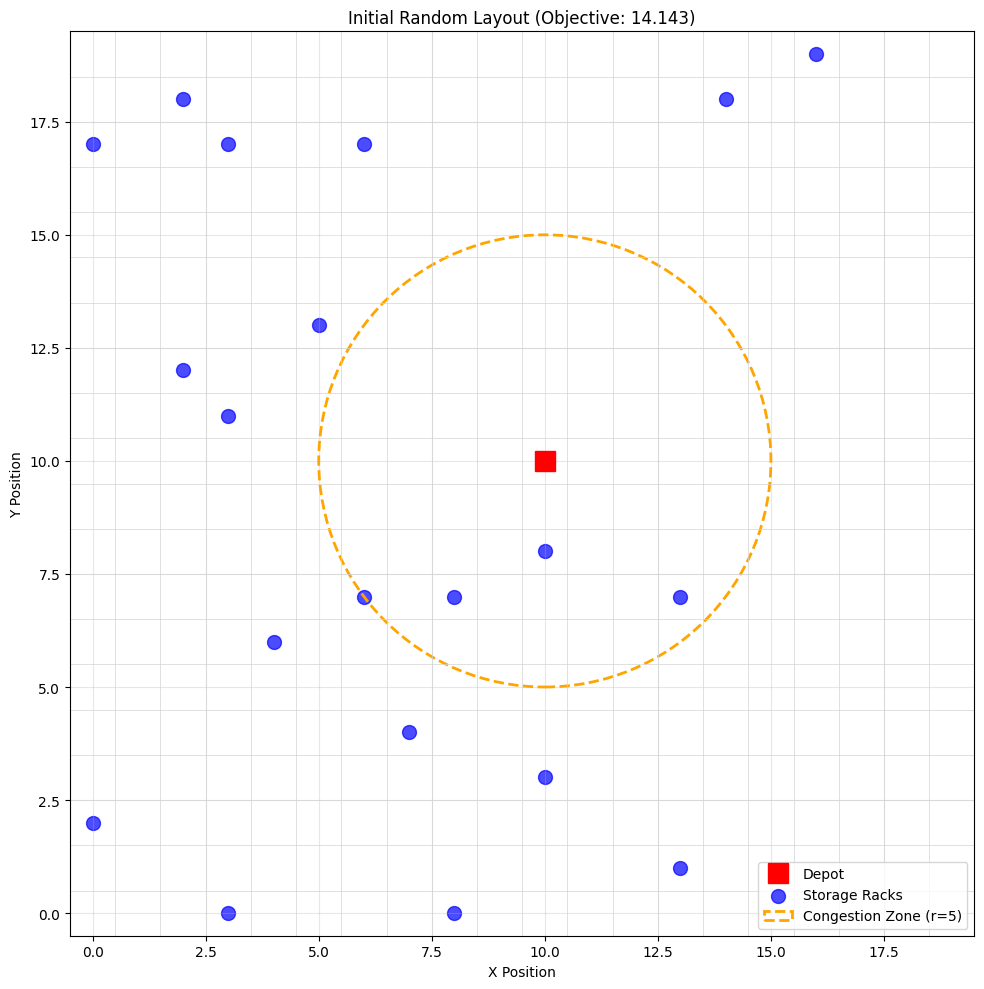

Hill Climbing started with initial objective: 14.143
Iteration 1: Improved to 12.181
Iteration 2: Improved to 10.250
Iteration 3: Improved to 10.180
Iteration 4: Improved to 10.109
Iteration 5: Improved to 10.038
Iteration 6: Improved to 9.968
Iteration 7: Improved to 9.897
Iteration 8: Improved to 9.826
Iteration 9: Improved to 9.756
Iteration 10: Improved to 9.686
Iteration 11: Improved to 9.616
Iteration 12: Improved to 9.546
Iteration 13: Improved to 9.477
Iteration 14: Improved to 9.408
Iteration 15: Improved to 9.339
Iteration 16: Improved to 9.270
Iteration 17: Improved to 9.201
Iteration 18: Improved to 9.131
Iteration 19: Improved to 9.062
Iteration 20: Improved to 8.994
Iteration 21: Improved to 8.925
Iteration 22: Improved to 8.858
Iteration 23: Improved to 8.790
Iteration 24: Improved to 8.722
Iteration 25: Improved to 8.656
Iteration 26: Improved to 8.590
Iteration 27: Improved to 8.522
Iteration 28: Improved to 8.456
Iteration 29: Improved to 8.390
Iteration 30: Improved 

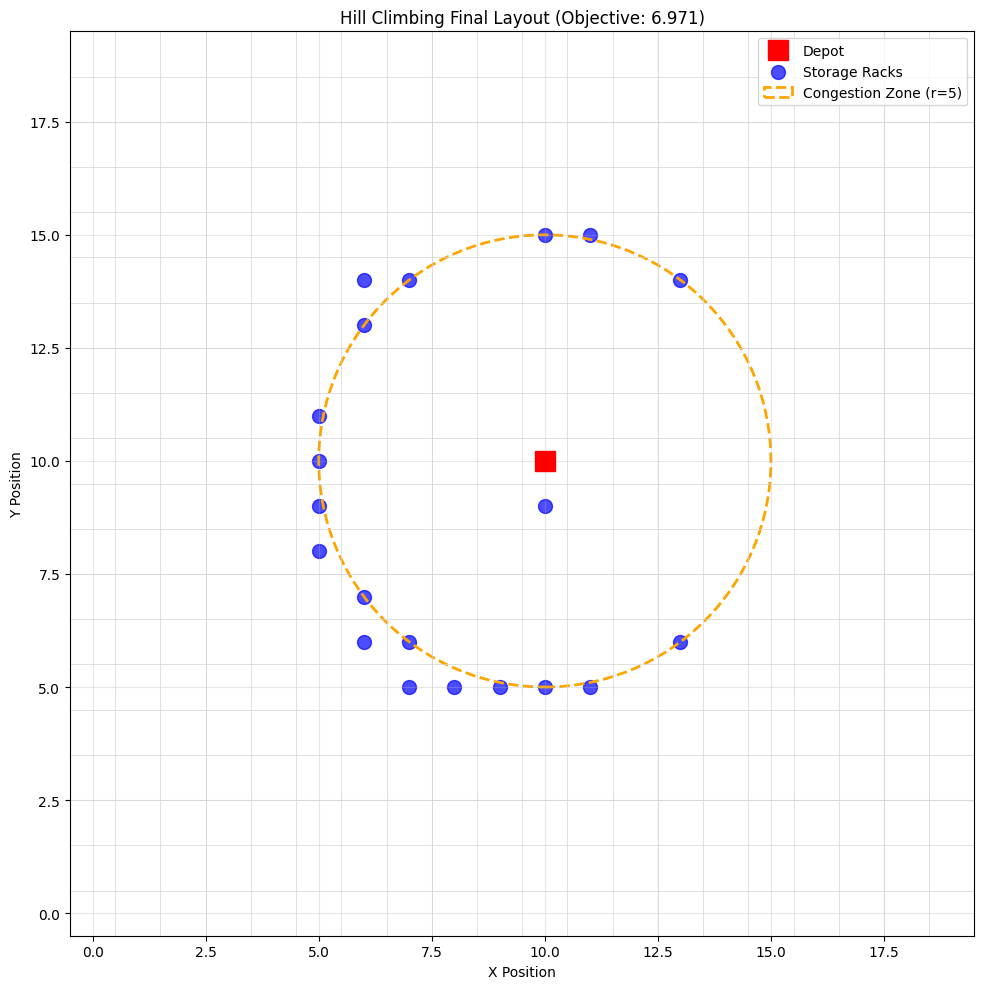

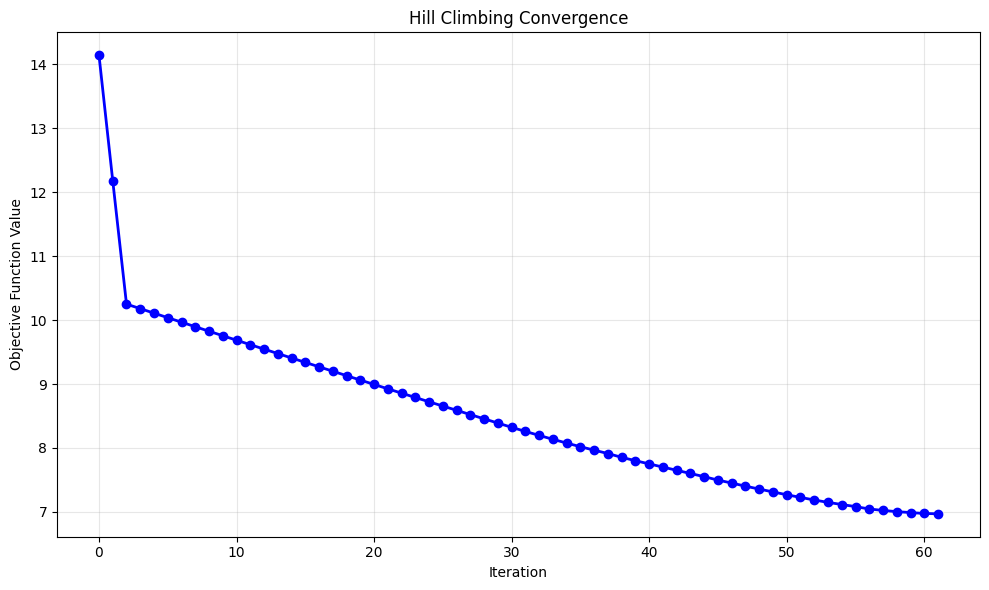


Final Solution Analysis:
  Average travel distance: 4.971
  Congestion penalty count: 1
  Congestion penalty value: 2.000
  Total objective: 6.971


In [ ]:
# Hill Climbing Algorithm for Warehouse Layout Optimization

import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy
import time

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

def distance(pos1, pos2):
    """Calculate Manhattan distance between two positions"""
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def objective_function(rack_positions, depot_pos=(10, 10), lambda_weight=2.0):
    """
    Calculate objective function f(s) = average_travel_distance + congestion_penalty
    
    Args:
        rack_positions: List of (x, y) tuples for rack positions
        depot_pos: (x, y) tuple for depot position  
        lambda_weight: Congestion penalty weight
        
    Returns:
        Objective function value (lower is better)
    """
    if len(rack_positions) == 0:
        return float('inf')
    
    # Average travel distance term
    total_distance = sum(distance(depot_pos, rack_pos) for rack_pos in rack_positions)
    avg_travel_distance = total_distance / len(rack_positions)
    
    # Congestion penalty term (number of racks within distance 5 of depot)
    congestion_count = sum(1 for rack_pos in rack_positions 
                          if distance(depot_pos, rack_pos) < 5)
    congestion_penalty = lambda_weight * congestion_count
    
    return avg_travel_distance + congestion_penalty

def generate_random_layout(grid_size=20, num_racks=20, depot_pos=(10, 10)):
    """Generate random initial layout of storage racks"""
    positions = []
    occupied = set([depot_pos])  # Depot position is occupied
    
    while len(positions) < num_racks:
        x = random.randint(0, grid_size-1)
        y = random.randint(0, grid_size-1)
        
        if (x, y) not in occupied:
            positions.append((x, y))
            occupied.add((x, y))
    
    return positions

def get_neighbors(rack_positions, grid_size=20, depot_pos=(10, 10)):
    """Generate neighboring solutions by moving one rack to an adjacent empty position"""
    neighbors = []
    
    for rack_idx in range(len(rack_positions)):
        current_pos = rack_positions[rack_idx]
        
        # Try moving this rack to adjacent positions
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip current position
                    
                new_x = current_pos[0] + dx
                new_y = current_pos[1] + dy
                
                # Check bounds
                if 0 <= new_x < grid_size and 0 <= new_y < grid_size:
                    new_pos = (new_x, new_y)
                    
                    # Check if new position is not occupied by depot or other racks
                    if (new_pos != depot_pos and 
                        new_pos not in [rack_positions[i] for i in range(len(rack_positions)) if i != rack_idx]):
                        
                        # Create neighbor solution
                        neighbor = rack_positions.copy()
                        neighbor[rack_idx] = new_pos
                        neighbors.append(neighbor)
    
    return neighbors

def hill_climbing(initial_solution, max_iterations=1000, depot_pos=(10, 10)):
    """
    Hill Climbing algorithm for warehouse layout optimization
    
    Args:
        initial_solution: Initial rack positions
        max_iterations: Maximum number of iterations
        depot_pos: Depot position
        
    Returns:
        Dictionary with best solution, objective value, and iteration history
    """
    start_time = time.time()
    
    current_solution = initial_solution.copy()
    current_value = objective_function(current_solution, depot_pos)
    
    best_solution = current_solution.copy()
    best_value = current_value
    
    iteration_history = [current_value]
    
    print(f"Hill Climbing started with initial objective: {current_value:.3f}")
    
    for iteration in range(max_iterations):
        neighbors = get_neighbors(current_solution, depot_pos=depot_pos)
        
        if not neighbors:
            print(f"No neighbors found at iteration {iteration}")
            break
        
        # Find best neighbor
        best_neighbor = None
        best_neighbor_value = float('inf')
        
        for neighbor in neighbors:
            neighbor_value = objective_function(neighbor, depot_pos)
            if neighbor_value < best_neighbor_value:
                best_neighbor = neighbor
                best_neighbor_value = neighbor_value
        
        # Hill climbing: only move to better neighbors
        if best_neighbor_value < current_value:
            current_solution = best_neighbor
            current_value = best_neighbor_value
            
            if current_value < best_value:
                best_solution = current_solution.copy()
                best_value = current_value
            
            print(f"Iteration {iteration + 1}: Improved to {current_value:.3f}")
        else:
            print(f"Iteration {iteration + 1}: No improvement found, stopping (local optimum)")
            break
        
        iteration_history.append(current_value)
    
    end_time = time.time()
    
    return {
        'best_solution': best_solution,
        'best_value': best_value,
        'iteration_history': iteration_history,
        'total_iterations': len(iteration_history) - 1,
        'computation_time': end_time - start_time
    }

def visualize_layout(rack_positions, depot_pos=(10, 10), title="Warehouse Layout", objective_val=None):
    """Visualize the warehouse layout"""
    plt.figure(figsize=(10, 10))
    
    # Draw grid
    for i in range(21):
        plt.axhline(y=i-0.5, color='lightgray', linewidth=0.5)
        plt.axvline(x=i-0.5, color='lightgray', linewidth=0.5)
    
    # Draw depot
    plt.plot(depot_pos[0], depot_pos[1], 's', markersize=15, color='red', label='Depot')
    
    # Draw storage racks
    rack_x = [pos[0] for pos in rack_positions]
    rack_y = [pos[1] for pos in rack_positions]
    plt.scatter(rack_x, rack_y, s=100, color='blue', alpha=0.7, label='Storage Racks')
    
    # Draw congestion zone (distance < 5 from depot)
    congestion_circle = plt.Circle(depot_pos, 5, fill=False, color='orange', linewidth=2, linestyle='--', label='Congestion Zone (r=5)')
    plt.gca().add_patch(congestion_circle)
    
    plt.xlim(-0.5, 19.5)
    plt.ylim(-0.5, 19.5)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    if objective_val is not None:
        title += f" (Objective: {objective_val:.3f})"
    plt.title(title)
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()

# Run Hill Climbing Algorithm
print("="*60)
print("HILL CLIMBING ALGORITHM")
print("="*60)

# Generate initial random solution
initial_layout = generate_random_layout()
initial_obj = objective_function(initial_layout)

print(f"Initial layout generated with {len(initial_layout)} racks")
print(f"Initial objective function value: {initial_obj:.3f}")

# Visualize initial layout
visualize_layout(initial_layout, title="Initial Random Layout", objective_val=initial_obj)

# Run hill climbing
hc_result = hill_climbing(initial_layout)

print(f"\nHill Climbing Results:")
print(f"  Best objective value: {hc_result['best_value']:.3f}")
print(f"  Total iterations: {hc_result['total_iterations']}")
print(f"  Computation time: {hc_result['computation_time']:.3f} seconds")
print(f"  Improvement: {initial_obj - hc_result['best_value']:.3f}")

# Visualize final layout
visualize_layout(hc_result['best_solution'], title="Hill Climbing Final Layout", 
                objective_val=hc_result['best_value'])

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(hc_result['iteration_history'], 'b-', linewidth=2, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Hill Climbing Convergence')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze final solution
depot_pos = (10, 10)
final_positions = hc_result['best_solution']

total_distance = sum(distance(depot_pos, pos) for pos in final_positions)
avg_distance = total_distance / len(final_positions)
congestion_count = sum(1 for pos in final_positions if distance(depot_pos, pos) < 5)

print(f"\nFinal Solution Analysis:")
print(f"  Average travel distance: {avg_distance:.3f}")
print(f"  Congestion penalty count: {congestion_count}")
print(f"  Congestion penalty value: {2.0 * congestion_count:.3f}")
print(f"  Total objective: {avg_distance + 2.0 * congestion_count:.3f}")

SIMULATED ANNEALING ALGORITHM
Initial layout generated with 20 racks
Initial objective function value: 13.660


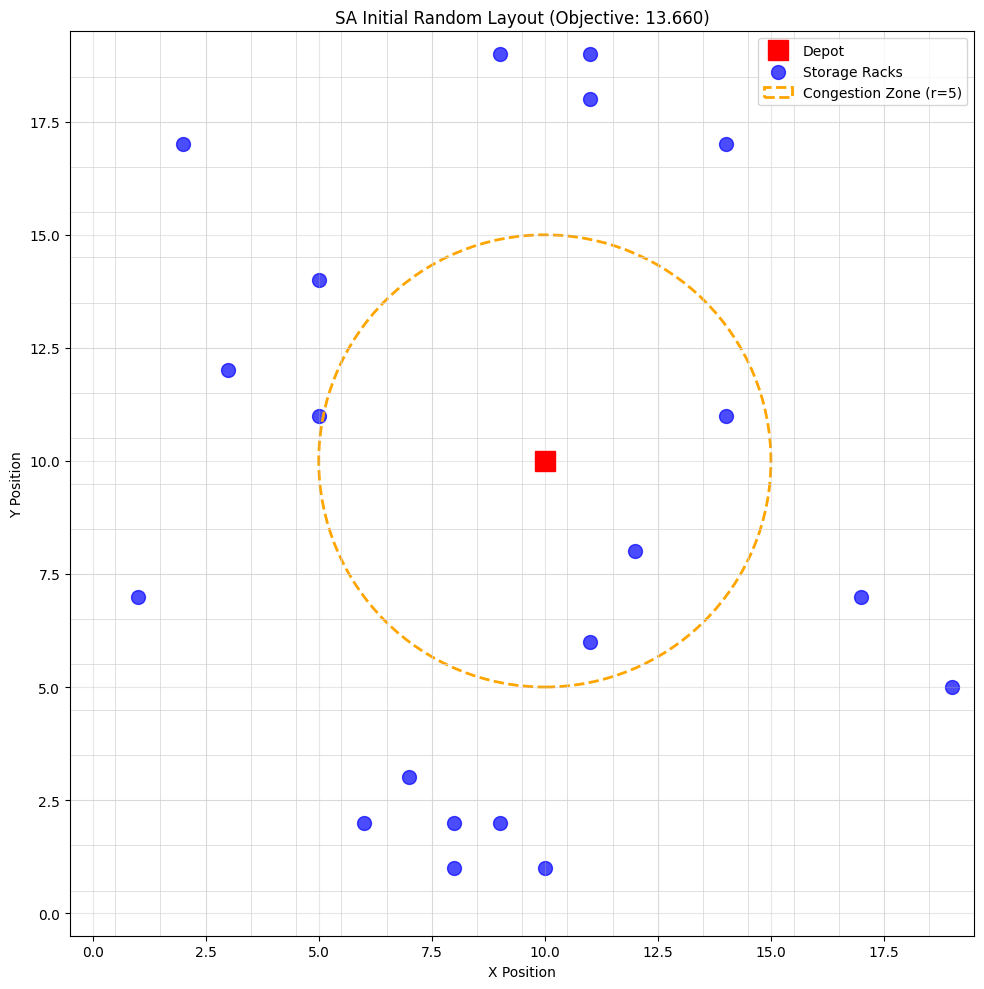

Simulated Annealing started with initial objective: 13.660
Initial temperature: 100.00
Iteration 1: New best solution 13.633 (T=100.000)
Iteration 4: New best solution 13.604 (T=98.507)
Iteration 13: New best solution 13.582 (T=94.162)
Iteration 14: New best solution 13.514 (T=93.691)
Iteration 18: New best solution 13.482 (T=91.832)
Iteration 20: New best solution 13.422 (T=90.916)
Iteration 22: New best solution 13.406 (T=90.009)
Iteration 37: New best solution 13.364 (T=83.489)
Iteration 38: New best solution 13.315 (T=83.072)
Iteration 41: New best solution 13.258 (T=81.832)
Iteration 42: New best solution 13.233 (T=81.423)
Iteration 79: New best solution 13.184 (T=67.639)
Iteration 83: New best solution 13.174 (T=66.297)
Iteration 84: New best solution 13.156 (T=65.965)
Iteration 169: New best solution 13.144 (T=43.080)
Iteration 170: New best solution 13.074 (T=42.865)
Iteration 172: New best solution 13.056 (T=42.437)
Iteration 176: New best solution 13.042 (T=41.595)
Iteration 

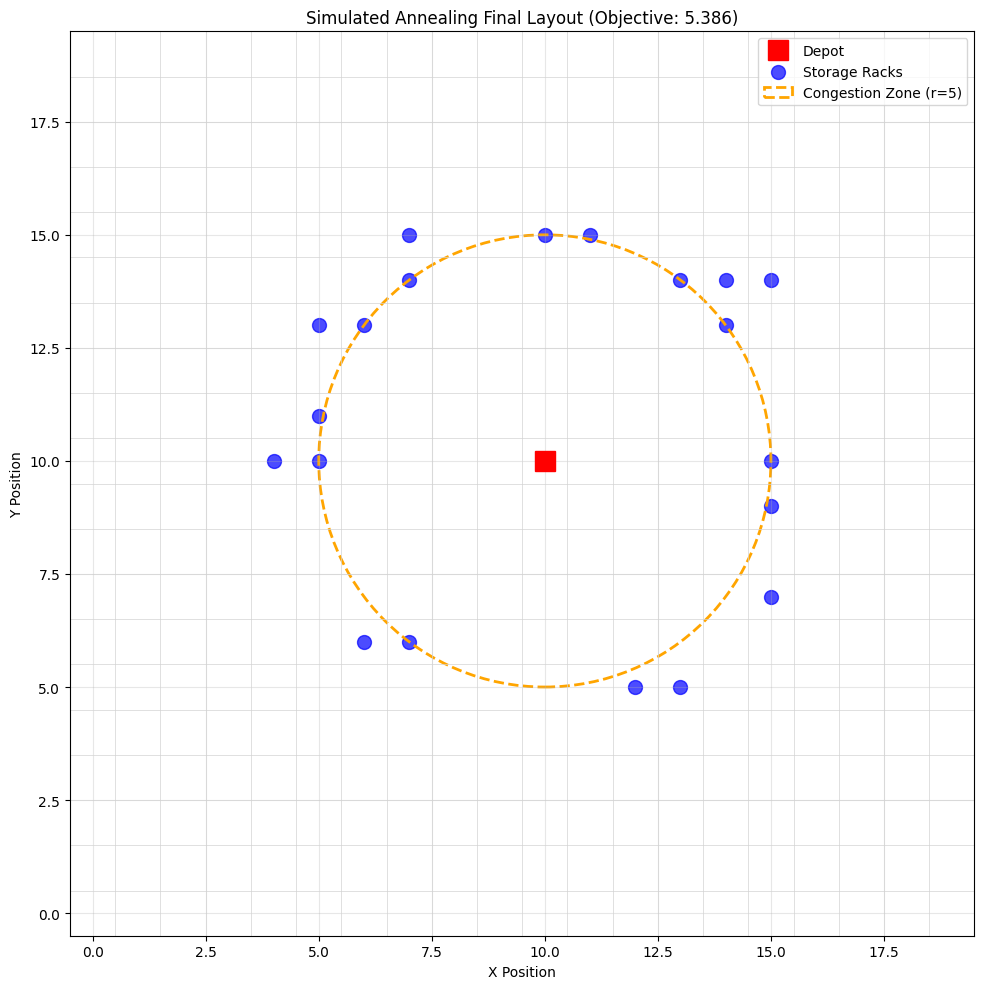

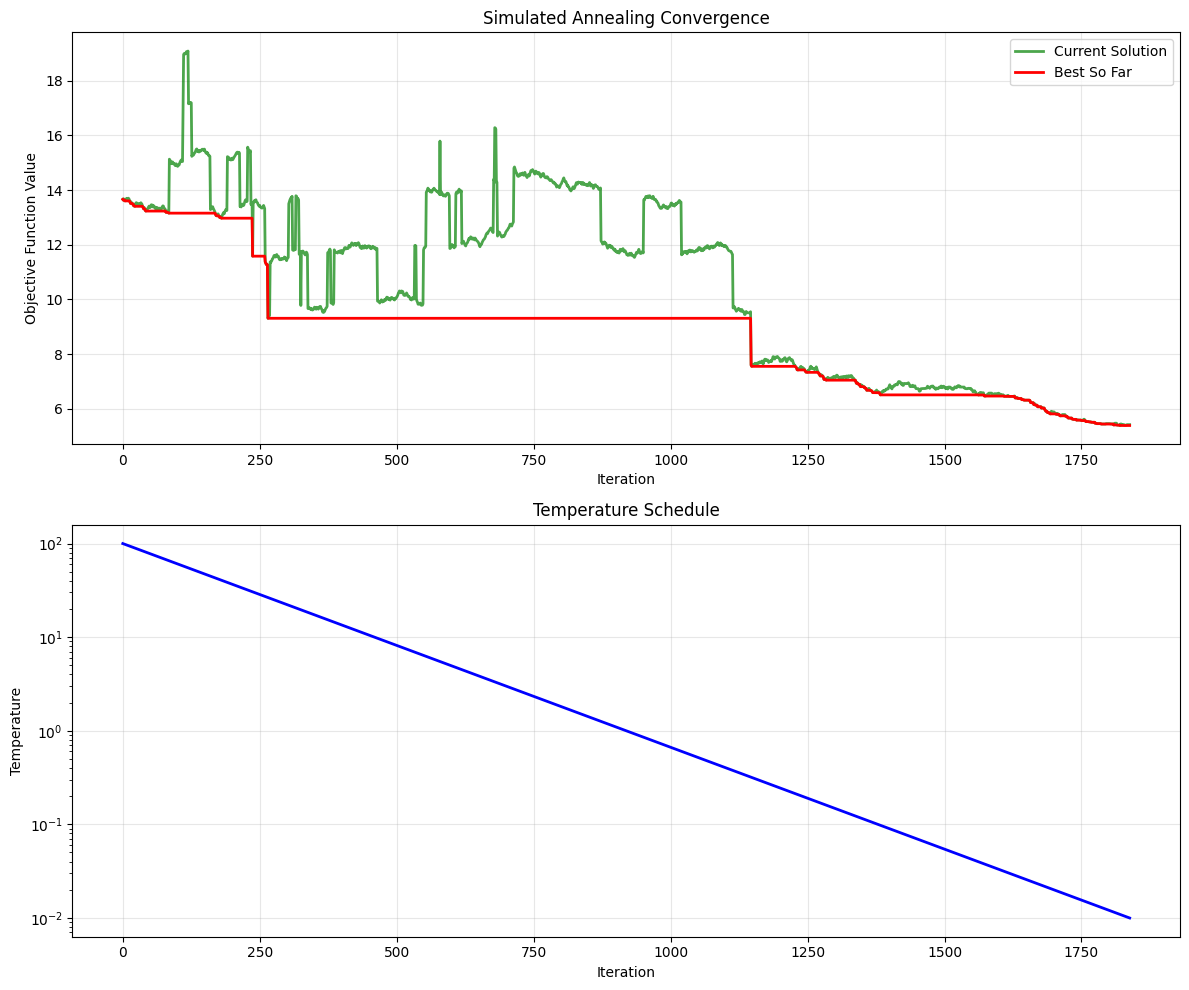


Final Solution Analysis:
  Average travel distance: 5.386
  Congestion penalty count: 0
  Congestion penalty value: 0.000
  Total objective: 5.386


In [2]:
# Simulated Annealing Algorithm for Warehouse Layout Optimization

import math

def simulated_annealing(initial_solution, max_iterations=2000, initial_temp=100.0, 
                       cooling_rate=0.95, min_temp=0.01, depot_pos=(10, 10)):
    """
    Simulated Annealing algorithm for warehouse layout optimization
    
    Args:
        initial_solution: Initial rack positions
        max_iterations: Maximum number of iterations
        initial_temp: Starting temperature
        cooling_rate: Temperature reduction factor
        min_temp: Minimum temperature threshold
        depot_pos: Depot position
        
    Returns:
        Dictionary with best solution, objective value, and iteration history
    """
    start_time = time.time()
    
    current_solution = initial_solution.copy()
    current_value = objective_function(current_solution, depot_pos)
    
    best_solution = current_solution.copy()
    best_value = current_value
    
    temperature = initial_temp
    iteration_history = [current_value]
    temperature_history = [temperature]
    acceptance_count = 0
    
    print(f"Simulated Annealing started with initial objective: {current_value:.3f}")
    print(f"Initial temperature: {initial_temp:.2f}")
    
    for iteration in range(max_iterations):
        if temperature < min_temp:
            print(f"Minimum temperature reached at iteration {iteration}")
            break
        
        neighbors = get_neighbors(current_solution, depot_pos=depot_pos)
        
        if not neighbors:
            print(f"No neighbors found at iteration {iteration}")
            break
        
        # Randomly select a neighbor
        neighbor = random.choice(neighbors)
        neighbor_value = objective_function(neighbor, depot_pos)
        
        # Calculate acceptance probability
        if neighbor_value < current_value:
            # Better solution - always accept
            accept = True
            acceptance_count += 1
        else:
            # Worse solution - accept with probability based on temperature
            delta = neighbor_value - current_value
            probability = math.exp(-delta / temperature)
            accept = random.random() < probability
            if accept:
                acceptance_count += 1
        
        if accept:
            current_solution = neighbor
            current_value = neighbor_value
            
            # Update best solution if improved
            if current_value < best_value:
                best_solution = current_solution.copy()
                best_value = current_value
                print(f"Iteration {iteration + 1}: New best solution {best_value:.3f} (T={temperature:.3f})")
        
        # Cool down temperature
        temperature *= cooling_rate
        
        iteration_history.append(current_value)
        temperature_history.append(temperature)
        
        # Progress reporting
        if (iteration + 1) % 200 == 0:
            print(f"Iteration {iteration + 1}: Current={current_value:.3f}, Best={best_value:.3f}, T={temperature:.3f}")
    
    end_time = time.time()
    
    acceptance_rate = acceptance_count / max(1, len(iteration_history) - 1)
    
    return {
        'best_solution': best_solution,
        'best_value': best_value,
        'iteration_history': iteration_history,
        'temperature_history': temperature_history,
        'total_iterations': len(iteration_history) - 1,
        'computation_time': end_time - start_time,
        'acceptance_rate': acceptance_rate,
        'final_temperature': temperature
    }

# Run Simulated Annealing Algorithm
print("="*60)
print("SIMULATED ANNEALING ALGORITHM")
print("="*60)

# Use same initial layout for fair comparison
sa_initial_layout = generate_random_layout()
sa_initial_obj = objective_function(sa_initial_layout)

print(f"Initial layout generated with {len(sa_initial_layout)} racks")
print(f"Initial objective function value: {sa_initial_obj:.3f}")

# Visualize initial layout
visualize_layout(sa_initial_layout, title="SA Initial Random Layout", objective_val=sa_initial_obj)

# Run simulated annealing
sa_result = simulated_annealing(
    sa_initial_layout,
    max_iterations=2000,
    initial_temp=100.0,
    cooling_rate=0.995,
    min_temp=0.01
)

print(f"\nSimulated Annealing Results:")
print(f"  Best objective value: {sa_result['best_value']:.3f}")
print(f"  Total iterations: {sa_result['total_iterations']}")
print(f"  Computation time: {sa_result['computation_time']:.3f} seconds")
print(f"  Improvement: {sa_initial_obj - sa_result['best_value']:.3f}")
print(f"  Acceptance rate: {sa_result['acceptance_rate']:.3f}")
print(f"  Final temperature: {sa_result['final_temperature']:.6f}")

# Visualize final layout
visualize_layout(sa_result['best_solution'], title="Simulated Annealing Final Layout", 
                objective_val=sa_result['best_value'])

# Plot convergence and temperature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Convergence plot
ax1.plot(sa_result['iteration_history'], 'g-', linewidth=2, alpha=0.7, label='Current Solution')
best_history = []
best_so_far = float('inf')
for val in sa_result['iteration_history']:
    if val < best_so_far:
        best_so_far = val
    best_history.append(best_so_far)
ax1.plot(best_history, 'r-', linewidth=2, label='Best So Far')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective Function Value')
ax1.set_title('Simulated Annealing Convergence')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Temperature plot
ax2.plot(sa_result['temperature_history'], 'b-', linewidth=2)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Temperature')
ax2.set_title('Temperature Schedule')
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# Analyze final solution
sa_final_positions = sa_result['best_solution']
sa_total_distance = sum(distance(depot_pos, pos) for pos in sa_final_positions)
sa_avg_distance = sa_total_distance / len(sa_final_positions)
sa_congestion_count = sum(1 for pos in sa_final_positions if distance(depot_pos, pos) < 5)

print(f"\nFinal Solution Analysis:")
print(f"  Average travel distance: {sa_avg_distance:.3f}")
print(f"  Congestion penalty count: {sa_congestion_count}")
print(f"  Congestion penalty value: {2.0 * sa_congestion_count:.3f}")
print(f"  Total objective: {sa_avg_distance + 2.0 * sa_congestion_count:.3f}")

GENETIC ALGORITHM
Genetic Algorithm started
Population size: 50
Initial best objective: 8.296
Generation 1: New best objective 8.076
Generation 2: New best objective 7.930
Generation 3: New best objective 7.678
Generation 6: New best objective 7.631
Generation 7: New best objective 7.228
Generation 8: New best objective 7.193
Generation 10: Best=7.193, Avg_fitness=0.122558
Generation 11: New best objective 7.184
Generation 12: New best objective 6.993
Generation 13: New best objective 6.866
Generation 15: New best objective 6.786
Generation 16: New best objective 6.781
Generation 17: New best objective 6.750
Generation 19: New best objective 6.686
Generation 20: New best objective 6.665
Generation 20: Best=6.665, Avg_fitness=0.128574
Generation 21: New best objective 6.404
Generation 26: New best objective 6.293
Generation 27: New best objective 6.180
Generation 30: New best objective 6.160
Generation 30: Best=6.160, Avg_fitness=0.128109
Generation 36: New best objective 6.134
Generati

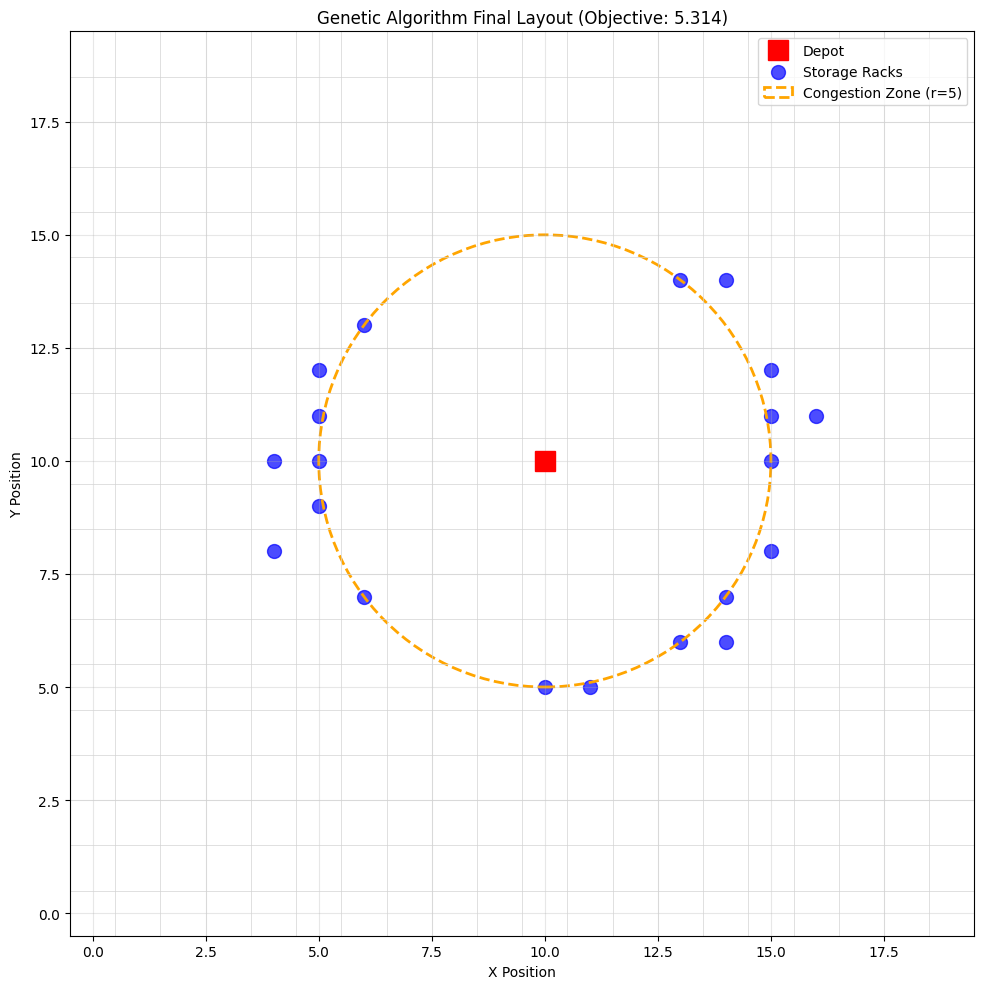

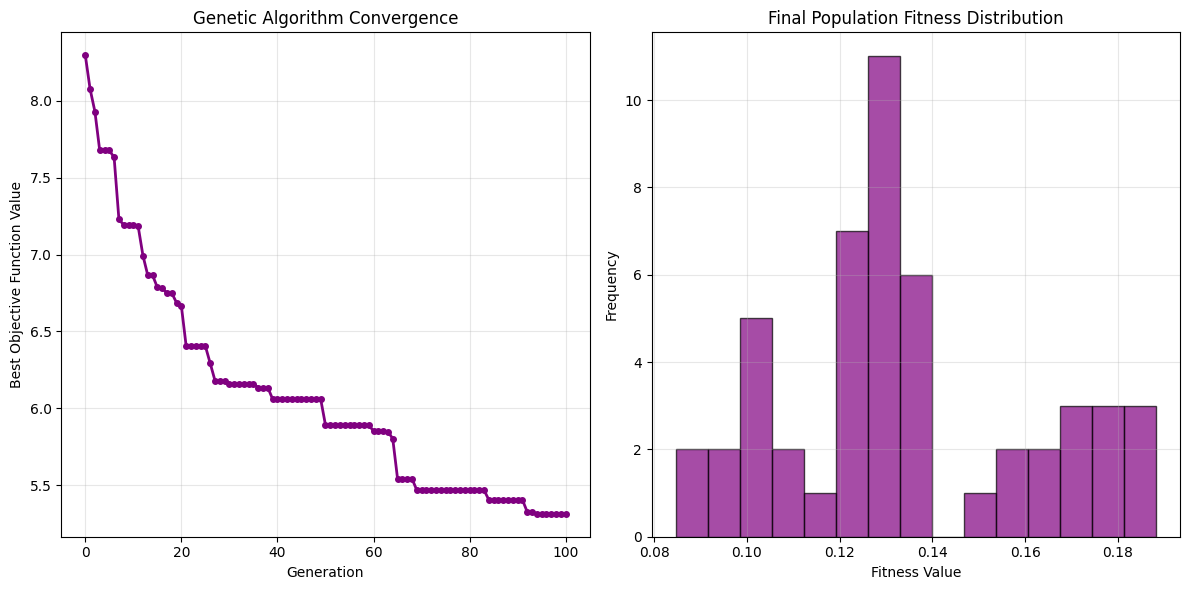


Final Solution Analysis:
  Average travel distance: 5.314
  Congestion penalty count: 0
  Congestion penalty value: 0.000
  Total objective: 5.314

Population Diversity:
  Best objective in final population: 5.314
  Worst objective in final population: 11.816
  Average objective in final population: 7.753
  Standard deviation: 1.561


In [3]:
# Genetic Algorithm for Warehouse Layout Optimization

def create_individual(grid_size=20, num_racks=20, depot_pos=(10, 10)):
    """Create a random individual (chromosome) representing rack positions"""
    return generate_random_layout(grid_size, num_racks, depot_pos)

def fitness(individual, depot_pos=(10, 10)):
    """Calculate fitness (inverse of objective function - higher is better)"""
    obj_val = objective_function(individual, depot_pos)
    # Add small epsilon to avoid division by zero
    return 1.0 / (obj_val + 1e-6)

def tournament_selection(population, fitness_values, tournament_size=3):
    """Select parent using tournament selection"""
    tournament_indices = random.sample(range(len(population)), min(tournament_size, len(population)))
    tournament_fitness = [fitness_values[i] for i in tournament_indices]
    winner_idx = tournament_indices[np.argmax(tournament_fitness)]
    return population[winner_idx]

def crossover(parent1, parent2, crossover_rate=0.8):
    """Create offspring using single-point crossover"""
    if random.random() > crossover_rate:
        return parent1.copy(), parent2.copy()
    
    # Single-point crossover
    crossover_point = random.randint(1, len(parent1) - 1)
    
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    
    return child1, child2

def mutate(individual, mutation_rate=0.1, grid_size=20, depot_pos=(10, 10)):
    """Mutate individual by randomly moving some racks"""
    mutated = individual.copy()
    
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            # Try to move this rack to a random nearby position
            current_pos = mutated[i]
            
            # Try several times to find a valid new position
            for _ in range(10):
                # Random movement within a small radius
                dx = random.randint(-3, 3)
                dy = random.randint(-3, 3)
                
                new_x = max(0, min(grid_size - 1, current_pos[0] + dx))
                new_y = max(0, min(grid_size - 1, current_pos[1] + dy))
                new_pos = (new_x, new_y)
                
                # Check if new position is valid (not depot, not occupied by other racks)
                if (new_pos != depot_pos and 
                    new_pos not in [mutated[j] for j in range(len(mutated)) if j != i]):
                    mutated[i] = new_pos
                    break
    
    return mutated

def repair_individual(individual, grid_size=20, depot_pos=(10, 10)):
    """Repair individual to ensure no duplicate positions and avoid depot"""
    repaired = []
    occupied = set([depot_pos])
    
    for pos in individual:
        if pos not in occupied and 0 <= pos[0] < grid_size and 0 <= pos[1] < grid_size:
            repaired.append(pos)
            occupied.add(pos)
        else:
            # Find a random free position
            attempts = 0
            while attempts < 100:
                x = random.randint(0, grid_size - 1)
                y = random.randint(0, grid_size - 1)
                new_pos = (x, y)
                
                if new_pos not in occupied:
                    repaired.append(new_pos)
                    occupied.add(new_pos)
                    break
                attempts += 1
            
            if attempts == 100:
                print(f"Warning: Could not find free position during repair")
    
    # Ensure we have the right number of racks
    while len(repaired) < len(individual):
        x = random.randint(0, grid_size - 1)
        y = random.randint(0, grid_size - 1)
        pos = (x, y)
        if pos not in occupied:
            repaired.append(pos)
            occupied.add(pos)
    
    return repaired[:len(individual)]

def genetic_algorithm(population_size=50, num_generations=100, crossover_rate=0.8, 
                     mutation_rate=0.15, elite_size=2, depot_pos=(10, 10)):
    """
    Genetic Algorithm for warehouse layout optimization
    
    Args:
        population_size: Size of the population
        num_generations: Number of generations
        crossover_rate: Probability of crossover
        mutation_rate: Probability of mutation per gene
        elite_size: Number of elite individuals to preserve
        depot_pos: Depot position
        
    Returns:
        Dictionary with best solution, objective value, and generation history
    """
    start_time = time.time()
    
    # Initialize population
    population = [create_individual(depot_pos=depot_pos) for _ in range(population_size)]
    
    # Calculate initial fitness
    fitness_values = [fitness(ind, depot_pos) for ind in population]
    
    best_individual = population[np.argmax(fitness_values)]
    best_fitness = max(fitness_values)
    best_objective = objective_function(best_individual, depot_pos)
    
    generation_history = [best_objective]
    
    print(f"Genetic Algorithm started")
    print(f"Population size: {population_size}")
    print(f"Initial best objective: {best_objective:.3f}")
    
    for generation in range(num_generations):
        # Sort population by fitness (descending)
        sorted_indices = np.argsort(fitness_values)[::-1]
        population = [population[i] for i in sorted_indices]
        fitness_values = [fitness_values[i] for i in sorted_indices]
        
        # Elitism: preserve best individuals
        new_population = population[:elite_size]
        
        # Generate offspring
        while len(new_population) < population_size:
            # Parent selection
            parent1 = tournament_selection(population, fitness_values)
            parent2 = tournament_selection(population, fitness_values)
            
            # Crossover
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            
            # Mutation
            child1 = mutate(child1, mutation_rate, depot_pos=depot_pos)
            child2 = mutate(child2, mutation_rate, depot_pos=depot_pos)
            
            # Repair to ensure validity
            child1 = repair_individual(child1, depot_pos=depot_pos)
            child2 = repair_individual(child2, depot_pos=depot_pos)
            
            new_population.extend([child1, child2])
        
        # Trim to exact population size
        population = new_population[:population_size]
        
        # Calculate fitness for new population
        fitness_values = [fitness(ind, depot_pos) for ind in population]
        
        # Update best solution
        current_best_idx = np.argmax(fitness_values)
        current_best_fitness = fitness_values[current_best_idx]
        current_best_objective = objective_function(population[current_best_idx], depot_pos)
        
        if current_best_objective < best_objective:
            best_individual = population[current_best_idx].copy()
            best_fitness = current_best_fitness
            best_objective = current_best_objective
            print(f"Generation {generation + 1}: New best objective {best_objective:.3f}")
        
        generation_history.append(best_objective)
        
        # Progress reporting
        if (generation + 1) % 10 == 0:
            avg_fitness = np.mean(fitness_values)
            print(f"Generation {generation + 1}: Best={best_objective:.3f}, Avg_fitness={avg_fitness:.6f}")
    
    end_time = time.time()
    
    return {
        'best_solution': best_individual,
        'best_value': best_objective,
        'generation_history': generation_history,
        'total_generations': num_generations,
        'computation_time': end_time - start_time,
        'final_population': population,
        'final_fitness': fitness_values
    }

# Run Genetic Algorithm
print("="*60)
print("GENETIC ALGORITHM")
print("="*60)

# Run genetic algorithm
ga_result = genetic_algorithm(
    population_size=50,
    num_generations=100,
    crossover_rate=0.8,
    mutation_rate=0.15,
    elite_size=3
)

print(f"\nGenetic Algorithm Results:")
print(f"  Best objective value: {ga_result['best_value']:.3f}")
print(f"  Total generations: {ga_result['total_generations']}")
print(f"  Computation time: {ga_result['computation_time']:.3f} seconds")

# Calculate improvement from a random baseline
random_baseline = generate_random_layout()
baseline_obj = objective_function(random_baseline)
print(f"  Improvement over random baseline: {baseline_obj - ga_result['best_value']:.3f}")

# Visualize final layout
visualize_layout(ga_result['best_solution'], title="Genetic Algorithm Final Layout", 
                objective_val=ga_result['best_value'])

# Plot convergence
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ga_result['generation_history'], 'purple', linewidth=2, marker='o', markersize=4)
plt.xlabel('Generation')
plt.ylabel('Best Objective Function Value')
plt.title('Genetic Algorithm Convergence')
plt.grid(True, alpha=0.3)

# Plot fitness distribution of final population
plt.subplot(1, 2, 2)
plt.hist(ga_result['final_fitness'], bins=15, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Fitness Value')
plt.ylabel('Frequency')
plt.title('Final Population Fitness Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze final solution
ga_final_positions = ga_result['best_solution']
ga_total_distance = sum(distance(depot_pos, pos) for pos in ga_final_positions)
ga_avg_distance = ga_total_distance / len(ga_final_positions)
ga_congestion_count = sum(1 for pos in ga_final_positions if distance(depot_pos, pos) < 5)

print(f"\nFinal Solution Analysis:")
print(f"  Average travel distance: {ga_avg_distance:.3f}")
print(f"  Congestion penalty count: {ga_congestion_count}")
print(f"  Congestion penalty value: {2.0 * ga_congestion_count:.3f}")
print(f"  Total objective: {ga_avg_distance + 2.0 * ga_congestion_count:.3f}")

# Display population diversity
final_objectives = [objective_function(ind, depot_pos) for ind in ga_result['final_population']]
print(f"\nPopulation Diversity:")
print(f"  Best objective in final population: {min(final_objectives):.3f}")
print(f"  Worst objective in final population: {max(final_objectives):.3f}")
print(f"  Average objective in final population: {np.mean(final_objectives):.3f}")
print(f"  Standard deviation: {np.std(final_objectives):.3f}")